In [1]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [2]:
import requests
from multiprocessing.pool import ThreadPool as Pool

sites = [
    'https://github.com/veit/jupyter-tutorial/',
    'https://jupyter-tutorial.readthedocs.io/en/latest/',
    'https://github.com/veit/pyviz-tutorial/',
    'https://pyviz-tutorial.readthedocs.io/de/latest/',
    'https://cusy.io/en',
]

def sitesize(url):
    with requests.get(url) as u:
        return url, len(u.content)

pool = Pool(10)
for result in pool.imap_unordered(sitesize, sites):
    print(result)

('https://pyviz-tutorial.readthedocs.io/de/latest/', 32709)
('https://jupyter-tutorial.readthedocs.io/en/latest/', 79152)
('https://cusy.io/en', 30232)
('https://github.com/veit/pyviz-tutorial/', 193578)
('https://github.com/veit/jupyter-tutorial/', 223374)


In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
X=np.array([1,2,3,4,5,6,7,8,9,10])
Y=np.array([1.1,2.2,3.3,4.4,5.5,6.6,7.7,8.8,9.9,10.1])
Y_label=np.array(['A','C','A','A','B','A','B','A','C','A'])
start_time = time.perf_counter()
utils.downsamplingByLabel(X,Y,Y_label,0.8,'A',True)
finish_time = time.perf_counter()
print("Program finished in {} seconds - using serial".format(finish_time-start_time))

DEBUGING
lenFilter 6
r_times 4
irandom  3
index  3
SI
irandom  1
index  4
SI
irandom  0
index  4
NO, segundo intento
index  4
SI
irandom  1
index  6
SI
Program finished in 0.001422800007276237 seconds - using serial


In [5]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [6]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [7]:
len(array_Xtrain)

3492290

In [8]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [9]:
len(array_Ytrain)

3492290

In [10]:
array_Ytrain

array([[0.34130435],
       [0.35869565],
       [0.3673913 ],
       ...,
       [0.7       ],
       [0.69565217],
       [0.69130435]])

In [11]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

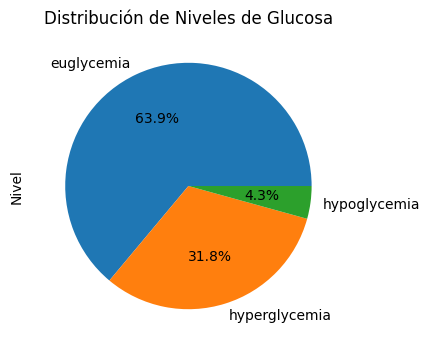

In [12]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [13]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       2232207
hyperglycemia    1110278
hypoglycemia      149805
Name: Nivel, dtype: int64

In [14]:
df_Y_scaled

,Glucose level,Nivel
0,197.0,hyperglycemia
1,205.0,hyperglycemia
2,209.0,hyperglycemia
3,204.0,hyperglycemia
4,200.0,hyperglycemia
...,...,...
3492285,361.0,hyperglycemia
3492286,364.0,hyperglycemia
3492287,362.0,hyperglycemia
3492288,360.0,hyperglycemia


## Paso 1

In [15]:
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [16]:
print(len(XP[2]))

34923


In [17]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

In [18]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [19]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 22835
Program finished in 15.082606000010855 seconds - using multiprocessing
1 45073
Program finished in 15.748690699983854 seconds - using multiprocessing
2 67283
Program finished in 15.900196599948686 seconds - using multiprocessing
3 90134
Program finished in 14.639311600010842 seconds - using multiprocessing
4 111735
Program finished in 16.25520949997008 seconds - using multiprocessing
5 133185
Program finished in 16.284542500041425 seconds - using multiprocessing
6 157696
Program finished in 13.07337950001238 seconds - using multiprocessing
7 183530
Program finished in 11.377932399976999 seconds - using multiprocessing
8 209674
Program finished in 11.057396699965466 seconds - using multiprocessing
9 236856
Program finished in 8.265348099987023 seconds - using multiprocessing
10 263284
Program finished in 6.865424400020856 seconds - using multiprocessing
11 288936
Program finished in 7.399296200019307 seconds - using multiprocessing
12 314273
Program finished in 7.95270470000105 

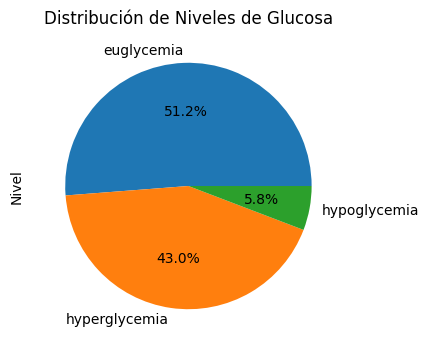

In [20]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [21]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       1323344
hyperglycemia    1110278
hypoglycemia      149805
Name: Nivel, dtype: int64

<AxesSubplot: >

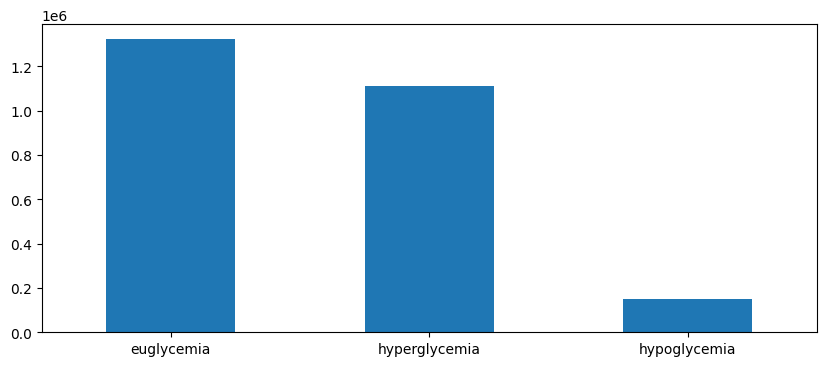

In [22]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [23]:
with open('dataset/generado/dataset15min/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [24]:
len(XNew)

2583427

In [25]:
with open('dataset/generado/dataset15min/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [26]:
len(YNew)

2583427

## Paso 2

In [27]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

25835


In [28]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 17653
Program finished in 4.202483300003223 seconds - using multiprocessing
1 34689
Program finished in 5.060599800024647 seconds - using multiprocessing
2 52446
Program finished in 5.260827500023879 seconds - using multiprocessing
3 68642
Program finished in 5.678112099994905 seconds - using multiprocessing
4 84825
Program finished in 6.280475299980026 seconds - using multiprocessing
5 103863
Program finished in 4.677478500001598 seconds - using multiprocessing
6 123813
Program finished in 3.9061535999644548 seconds - using multiprocessing
7 144402
Program finished in 3.838390899996739 seconds - using multiprocessing
8 165780
Program finished in 3.817056200001389 seconds - using multiprocessing
9 186918
Program finished in 3.6116776000126265 seconds - using multiprocessing
10 207142
Program finished in 4.166893399960827 seconds - using multiprocessing
11 226973
Program finished in 4.689302000042517 seconds - using multiprocessing
12 246418
Program finished in 5.118497900024522 secon

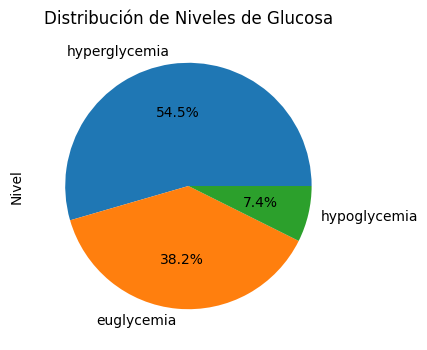

In [29]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [30]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    1110278
euglycemia        777379
hypoglycemia      149805
Name: Nivel, dtype: int64

In [31]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

20375


In [32]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 18812
Program finished in 1.428691000037361 seconds - using multiprocessing
1 36875
Program finished in 1.531681300024502 seconds - using multiprocessing
2 56068
Program finished in 0.8381120000267401 seconds - using multiprocessing
3 75822
Program finished in 0.598009999957867 seconds - using multiprocessing
4 92962
Program finished in 2.038497200002894 seconds - using multiprocessing
5 109844
Program finished in 2.276748099946417 seconds - using multiprocessing
6 125923
Program finished in 2.7813348000054248 seconds - using multiprocessing
7 141752
Program finished in 2.876120399974752 seconds - using multiprocessing
8 156959
Program finished in 3.5143230999819934 seconds - using multiprocessing
9 173167
Program finished in 2.9163480999995954 seconds - using multiprocessing
10 189285
Program finished in 2.8923703999607824 seconds - using multiprocessing
11 205473
Program finished in 2.9000645999913104 seconds - using multiprocessing
12 220611
Program finished in 3.3639693000004627 

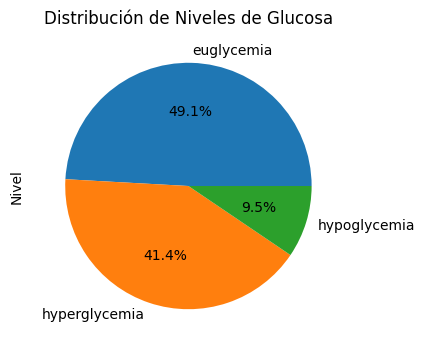

In [33]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [34]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       777379
hyperglycemia    655351
hypoglycemia     149805
Name: Nivel, dtype: int64

In [35]:
with open('dataset/generado/dataset15min/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [36]:
with open('dataset/generado/dataset15min/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 3

In [37]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

15826
0 11119
Program finished in 2.440735299955122 seconds - using multiprocessing
1 21744
Program finished in 2.356234599952586 seconds - using multiprocessing
2 32717
Program finished in 2.1531216999865137 seconds - using multiprocessing
3 42742
Program finished in 2.7469544999767095 seconds - using multiprocessing
4 52677
Program finished in 2.9885422000079416 seconds - using multiprocessing
5 64448
Program finished in 1.9514504999970086 seconds - using multiprocessing
6 76880
Program finished in 1.708608600019943 seconds - using multiprocessing
7 89629
Program finished in 1.6363132999977097 seconds - using multiprocessing
8 102879
Program finished in 1.5615121999871917 seconds - using multiprocessing
9 115904
Program finished in 1.6303698999690823 seconds - using multiprocessing
10 128662
Program finished in 1.7122562999720685 seconds - using multiprocessing
11 140775
Program finished in 2.185391500010155 seconds - using multiprocessing
12 152766
Program finished in 2.267341800034

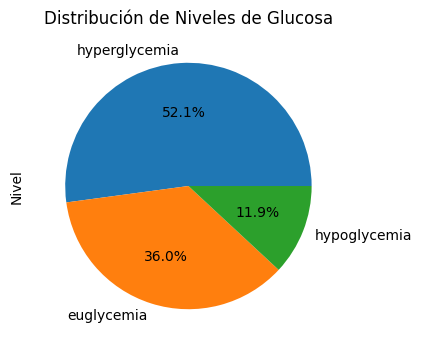

In [38]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [39]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    655351
euglycemia       451948
hypoglycemia     149805
Name: Nivel, dtype: int64

In [40]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

12572
0 11615
Program finished in 0.5842033000080846 seconds - using multiprocessing
1 22747
Program finished in 0.6529340999550186 seconds - using multiprocessing
2 34680
Program finished in 0.3722569000092335 seconds - using multiprocessing
3 46830
Program finished in 0.29533120000269264 seconds - using multiprocessing
4 57458
Program finished in 0.8848820999846794 seconds - using multiprocessing
5 68059
Program finished in 0.9934372000279836 seconds - using multiprocessing
6 78177
Program finished in 1.1075343000120483 seconds - using multiprocessing
7 88143
Program finished in 1.2439566999673843 seconds - using multiprocessing
8 97599
Program finished in 1.3588089999975637 seconds - using multiprocessing
9 107603
Program finished in 1.3492715999600478 seconds - using multiprocessing
10 117768
Program finished in 1.2766618999885395 seconds - using multiprocessing
11 127773
Program finished in 1.363139399967622 seconds - using multiprocessing
12 137254
Program finished in 1.600432799

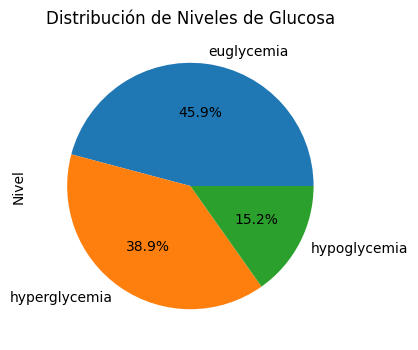

In [41]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [42]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       451948
hyperglycemia    383687
hypoglycemia     149805
Name: Nivel, dtype: int64

In [43]:
with open('dataset/generado/dataset15min/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [44]:
with open('dataset/generado/dataset15min/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 4

In [45]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

9855
0 7132
Program finished in 0.6609304000157863 seconds - using multiprocessing
1 13961
Program finished in 0.7875181999988854 seconds - using multiprocessing
2 20913
Program finished in 0.8627101000165567 seconds - using multiprocessing
3 27281
Program finished in 0.7748307999572717 seconds - using multiprocessing
4 33493
Program finished in 0.8186151999980211 seconds - using multiprocessing
5 40908
Program finished in 0.6810926000471227 seconds - using multiprocessing
6 48785
Program finished in 0.714327699970454 seconds - using multiprocessing
7 56980
Program finished in 0.7018484000000171 seconds - using multiprocessing
8 65386
Program finished in 0.6478428000118583 seconds - using multiprocessing
9 73773
Program finished in 0.8078375000040978 seconds - using multiprocessing
10 81772
Program finished in 0.7735260999761522 seconds - using multiprocessing
11 89429
Program finished in 0.8422508999938145 seconds - using multiprocessing
12 96986
Program finished in 0.8798663999768905

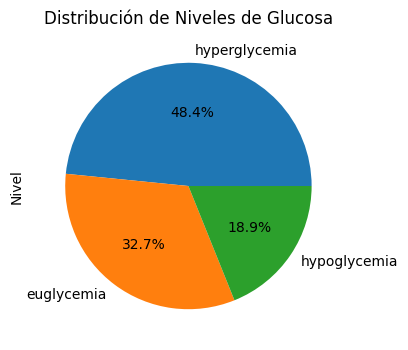

In [46]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [47]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    383687
euglycemia       258934
hypoglycemia     149805
Name: Nivel, dtype: int64

In [48]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

7925
0 7447
Program finished in 0.16513769997982308 seconds - using multiprocessing
1 14676
Program finished in 0.10055219999048859 seconds - using multiprocessing
2 22147
Program finished in 0.13195099995937198 seconds - using multiprocessing
3 29795
Program finished in 0.16528130002552643 seconds - using multiprocessing
4 36613
Program finished in 0.3066058000549674 seconds - using multiprocessing
5 43351
Program finished in 0.29670040000928566 seconds - using multiprocessing
6 49966
Program finished in 0.3353114000055939 seconds - using multiprocessing
7 56483
Program finished in 0.3582384000183083 seconds - using multiprocessing
8 62626
Program finished in 0.4051661000121385 seconds - using multiprocessing
9 68987
Program finished in 0.4619085000013001 seconds - using multiprocessing
10 75551
Program finished in 0.41758130001835525 seconds - using multiprocessing
11 81892
Program finished in 0.5305068999878131 seconds - using multiprocessing
12 88039
Program finished in 0.483392799

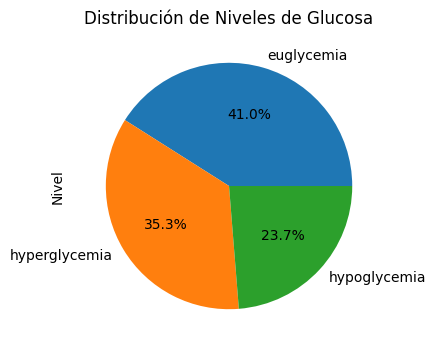

In [49]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [50]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       258934
hyperglycemia    222608
hypoglycemia     149805
Name: Nivel, dtype: int64

In [51]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [52]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 5

Cargamos nuevamente para evitar perder todo el trabajo debido a la demora del proceso

In [53]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [54]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [55]:
len(array_Xtrain)

631347

In [56]:
len(array_Ytrain)

631347

In [57]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

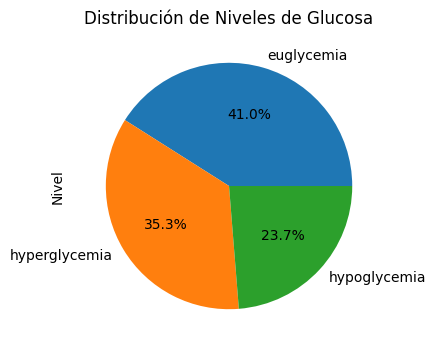

In [58]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [59]:
df_Y_scaled

,Glucose level,Nivel
0,106.0,euglycemia
1,91.0,euglycemia
2,114.0,euglycemia
3,125.0,euglycemia
4,205.0,hyperglycemia
...,...,...
631342,83.0,euglycemia
631343,89.0,euglycemia
631344,147.0,euglycemia
631345,118.0,euglycemia


In [60]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       258934
hyperglycemia    222608
hypoglycemia     149805
Name: Nivel, dtype: int64

In [61]:

N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.4,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

6314
0 4951
Program finished in 0.2506867000483908 seconds - using multiprocessing
1 9635
Program finished in 0.2216276999679394 seconds - using multiprocessing
2 14250
Program finished in 0.30410499998833984 seconds - using multiprocessing
3 18543
Program finished in 0.2802637999993749 seconds - using multiprocessing
4 22777
Program finished in 0.3149238000041805 seconds - using multiprocessing
5 27836
Program finished in 0.23725549998926 seconds - using multiprocessing
6 33170
Program finished in 0.22799689997918904 seconds - using multiprocessing
7 38700
Program finished in 0.24664470000425354 seconds - using multiprocessing
8 44410
Program finished in 0.2696457999991253 seconds - using multiprocessing
9 50069
Program finished in 0.2748687000130303 seconds - using multiprocessing
10 55491
Program finished in 0.2863303999765776 seconds - using multiprocessing
11 60792
Program finished in 0.3622353000100702 seconds - using multiprocessing
12 65844
Program finished in 0.368531999993138

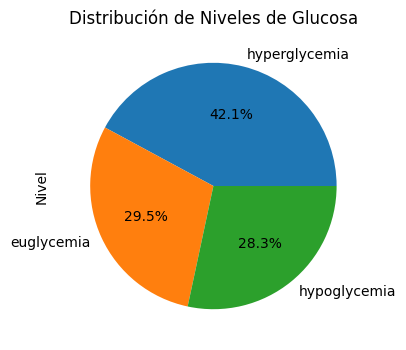

In [62]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [63]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    222608
euglycemia       156010
hypoglycemia     149805
Name: Nivel, dtype: int64

<AxesSubplot: >

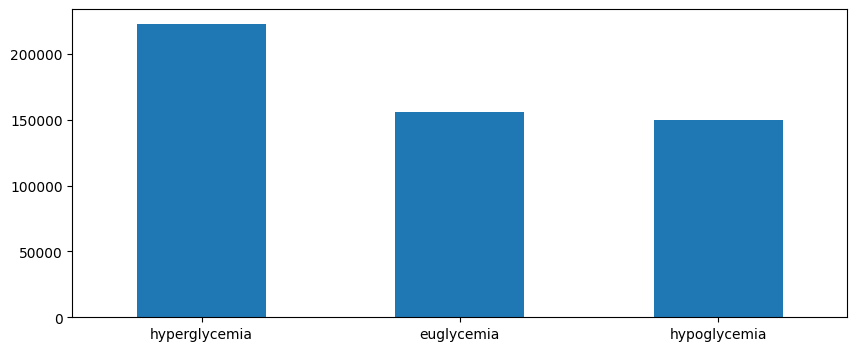

In [64]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [65]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.3,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

5285
0 5142
Program finished in 0.038018700026441365 seconds - using multiprocessing
1 10203
Program finished in 0.05841640004655346 seconds - using multiprocessing
2 15291
Program finished in 0.08689189999131486 seconds - using multiprocessing
3 20470
Program finished in 0.0954624000005424 seconds - using multiprocessing
4 25348
Program finished in 0.12831759999971837 seconds - using multiprocessing
5 30239
Program finished in 0.15230560000054538 seconds - using multiprocessing
6 35104
Program finished in 0.16770130000077188 seconds - using multiprocessing
7 39865
Program finished in 0.20641250000335276 seconds - using multiprocessing
8 44530
Program finished in 0.2581209999625571 seconds - using multiprocessing
9 49196
Program finished in 0.237461400043685 seconds - using multiprocessing
10 53945
Program finished in 0.24037610000232235 seconds - using multiprocessing
11 58623
Program finished in 0.2751377999666147 seconds - using multiprocessing
12 63140
Program finished in 0.3495456

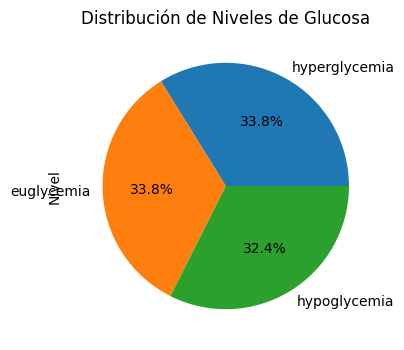

In [66]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [67]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    156281
euglycemia       156010
hypoglycemia     149805
Name: Nivel, dtype: int64

In [68]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'wb') as f:
    np.save(f, XNew)

In [69]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [70]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [71]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [72]:
len(array_Ytrain)

462096

In [73]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

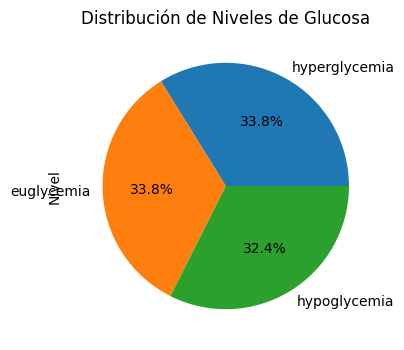

In [74]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [75]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    156281
euglycemia       156010
hypoglycemia     149805
Name: Nivel, dtype: int64

In [76]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [77]:
minClass

149805

In [78]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xtrain,array_Ytrain,array_Ytrain_label,0,'hyperglycemia',False,minClass) 

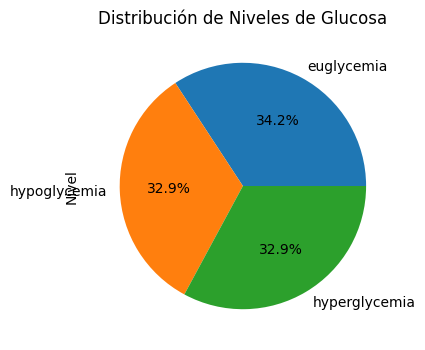

In [79]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [80]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       156010
hypoglycemia     149805
hyperglycemia    149805
Name: Nivel, dtype: int64

In [81]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

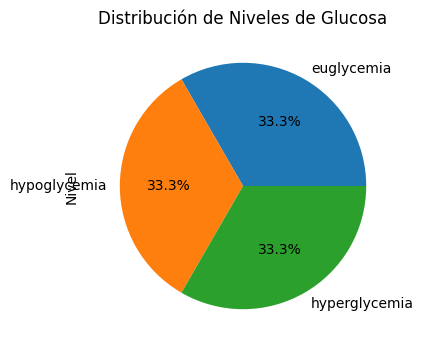

In [82]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [83]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       149805
hypoglycemia     149805
hyperglycemia    149805
Name: Nivel, dtype: int64

<AxesSubplot: >

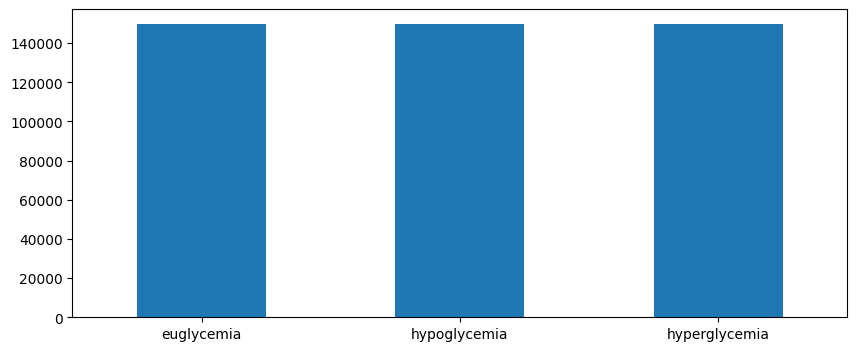

In [84]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [85]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [86]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling on validation dataset

In [87]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [88]:
len(array_Xval)

436537

In [89]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [90]:
len(array_Yval)

436537

In [91]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

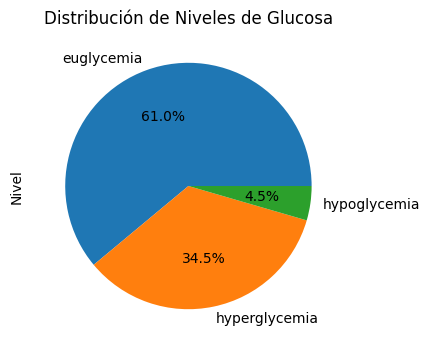

In [92]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [93]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       266493
hyperglycemia    150395
hypoglycemia      19649
Name: Nivel, dtype: int64

<AxesSubplot: >

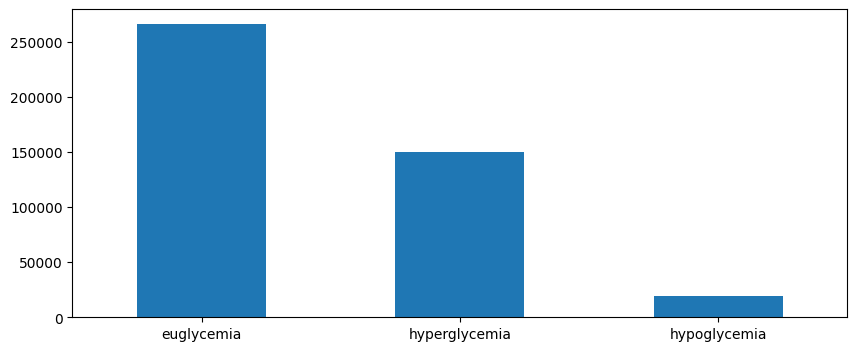

In [94]:
df_Yval_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [95]:
N=100
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

4366


In [96]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 2783
Program finished in 0.16680090001318604 seconds - using multiprocessing
1 5569
Program finished in 0.16554919996997342 seconds - using multiprocessing
2 8288
Program finished in 0.22838909999700263 seconds - using multiprocessing
3 10962
Program finished in 0.22980079997796565 seconds - using multiprocessing
4 13667
Program finished in 0.23195230000419542 seconds - using multiprocessing
5 16393
Program finished in 0.29302320000715554 seconds - using multiprocessing
6 19527
Program finished in 0.2662302000098862 seconds - using multiprocessing
7 22936
Program finished in 0.24279079999541864 seconds - using multiprocessing
8 26219
Program finished in 0.24814519996289164 seconds - using multiprocessing
9 29323
Program finished in 0.2979766000062227 seconds - using multiprocessing
10 32599
Program finished in 0.28637799998978153 seconds - using multiprocessing
11 35857
Program finished in 0.28520189999835566 seconds - using multiprocessing
12 38970
Program finished in 0.302984300011

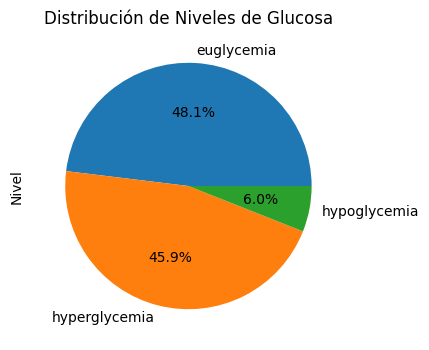

In [97]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [98]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       157399
hyperglycemia    150395
hypoglycemia      19649
Name: Nivel, dtype: int64

In [99]:
with open('dataset/generado/dataset15min/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [100]:
with open('dataset/generado/dataset15min/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [101]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

3275
0 2168
Program finished in 0.13331689999904484 seconds - using multiprocessing
1 4315
Program finished in 0.1466546999872662 seconds - using multiprocessing
2 6395
Program finished in 0.17495610000332817 seconds - using multiprocessing
3 8454
Program finished in 0.18690109997987747 seconds - using multiprocessing
4 10601
Program finished in 0.1739732000278309 seconds - using multiprocessing
5 13148
Program finished in 0.14548240002477542 seconds - using multiprocessing
6 15860
Program finished in 0.1656038000364788 seconds - using multiprocessing
7 18483
Program finished in 0.17058340000221506 seconds - using multiprocessing
8 20953
Program finished in 0.1811450999812223 seconds - using multiprocessing
9 23610
Program finished in 0.18324669997673482 seconds - using multiprocessing
10 26163
Program finished in 0.20316440000897273 seconds - using multiprocessing
11 28675
Program finished in 0.23388749995501712 seconds - using multiprocessing
12 31168
Program finished in 0.2169144999

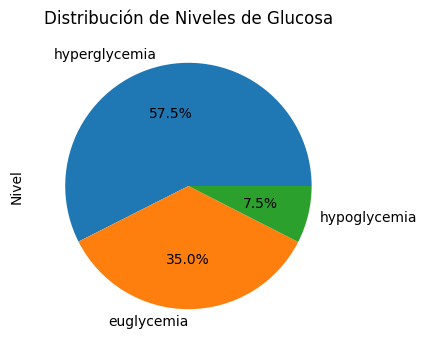

In [102]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [103]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    150395
euglycemia        91733
hypoglycemia      19649
Name: Nivel, dtype: int64

In [104]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

2618
0 2522
Program finished in 0.06122540001524612 seconds - using multiprocessing
1 5031
Program finished in 0.03679080004803836 seconds - using multiprocessing
2 7566
Program finished in 0.04242559999693185 seconds - using multiprocessing
3 9979
Program finished in 0.06837300001643598 seconds - using multiprocessing
4 12060
Program finished in 0.12777280004229397 seconds - using multiprocessing
5 13943
Program finished in 0.13618159998441115 seconds - using multiprocessing
6 15886
Program finished in 0.12272859999211505 seconds - using multiprocessing
7 18008
Program finished in 0.11867459997301921 seconds - using multiprocessing
8 19984
Program finished in 0.1618432000395842 seconds - using multiprocessing
9 22089
Program finished in 0.16626880003605038 seconds - using multiprocessing
10 24079
Program finished in 0.1906550000421703 seconds - using multiprocessing
11 26110
Program finished in 0.1861767999944277 seconds - using multiprocessing
12 28195
Program finished in 0.164095199

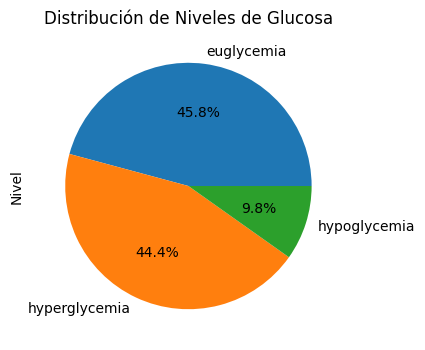

In [105]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [106]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       91733
hyperglycemia    88862
hypoglycemia     19649
Name: Nivel, dtype: int64

In [107]:
with open('dataset/generado/dataset15min/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [108]:
with open('dataset/generado/dataset15min/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [109]:
len(XNew)

200244

<AxesSubplot: >

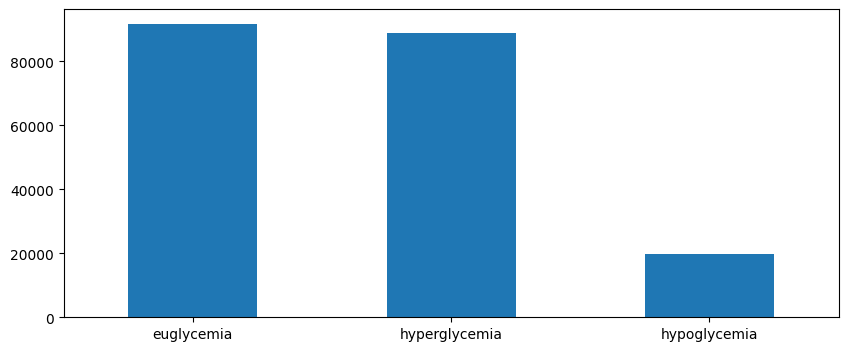

In [110]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [111]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

2003
0 1369
Program finished in 0.07633150002220646 seconds - using multiprocessing
1 2703
Program finished in 0.05891459999838844 seconds - using multiprocessing
2 3983
Program finished in 0.05974709999281913 seconds - using multiprocessing
3 5228
Program finished in 0.06802719994448125 seconds - using multiprocessing
4 6515
Program finished in 0.07560630002990365 seconds - using multiprocessing
5 8068
Program finished in 0.06768919999012724 seconds - using multiprocessing
6 9704
Program finished in 0.06270780001068488 seconds - using multiprocessing
7 11291
Program finished in 0.0790874999947846 seconds - using multiprocessing
8 12838
Program finished in 0.0805951000074856 seconds - using multiprocessing
9 14464
Program finished in 0.0816002999781631 seconds - using multiprocessing
10 16035
Program finished in 0.08626489999005571 seconds - using multiprocessing
11 17581
Program finished in 0.10849820001749322 seconds - using multiprocessing
12 19107
Program finished in 0.107133099983

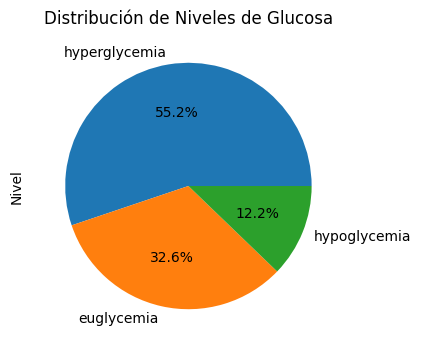

In [112]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [113]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    88862
euglycemia       52548
hypoglycemia     19649
Name: Nivel, dtype: int64

In [114]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1611
0 1573
Program finished in 0.03695139999035746 seconds - using multiprocessing
1 3113
Program finished in 0.022814099967945367 seconds - using multiprocessing
2 4676
Program finished in 0.02757430000929162 seconds - using multiprocessing
3 6173
Program finished in 0.036628699977882206 seconds - using multiprocessing
4 7447
Program finished in 0.06369370000902563 seconds - using multiprocessing
5 8627
Program finished in 0.06701270001940429 seconds - using multiprocessing
6 9837
Program finished in 0.07156899996334687 seconds - using multiprocessing
7 11112
Program finished in 0.06603879999602214 seconds - using multiprocessing
8 12306
Program finished in 0.07745139999315143 seconds - using multiprocessing
9 13622
Program finished in 0.0772811000351794 seconds - using multiprocessing
10 14837
Program finished in 0.10186200001044199 seconds - using multiprocessing
11 16101
Program finished in 0.11235549999400973 seconds - using multiprocessing
12 17404
Program finished in 0.10466230

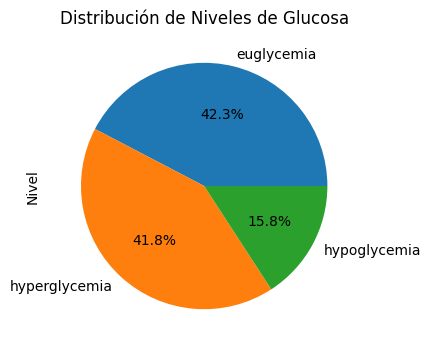

In [115]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [116]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       52548
hyperglycemia    51912
hypoglycemia     19649
Name: Nivel, dtype: int64

In [117]:
with open('dataset/generado/dataset15min/array_Xval_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [118]:
with open('dataset/generado/dataset15min/array_Yval_down3.npy', 'wb') as f:
    np.save(f, YNew)

In [119]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1242
0 868
Program finished in 0.0428990000509657 seconds - using multiprocessing
1 1734
Program finished in 0.029256300011184067 seconds - using multiprocessing
2 2580
Program finished in 0.03169159998651594 seconds - using multiprocessing
3 3344
Program finished in 0.040296000021044165 seconds - using multiprocessing
4 4158
Program finished in 0.039603999990504235 seconds - using multiprocessing
5 5113
Program finished in 0.0341735000256449 seconds - using multiprocessing
6 6154
Program finished in 0.035883800010196865 seconds - using multiprocessing
7 7149
Program finished in 0.043111200036946684 seconds - using multiprocessing
8 8107
Program finished in 0.048366300005000085 seconds - using multiprocessing
9 9127
Program finished in 0.049331000016536564 seconds - using multiprocessing
10 10129
Program finished in 0.05692569998791441 seconds - using multiprocessing
11 11079
Program finished in 0.06683189998148009 seconds - using multiprocessing
12 12027
Program finished in 0.06753200

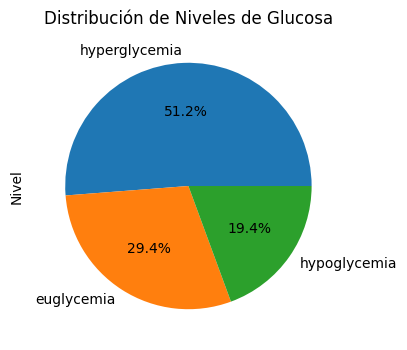

In [120]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [121]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    51912
euglycemia       29780
hypoglycemia     19649
Name: Nivel, dtype: int64

In [122]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1014
0 995
Program finished in 0.023771299980580807 seconds - using multiprocessing
1 1980
Program finished in 0.014837299997452646 seconds - using multiprocessing
2 2959
Program finished in 0.018863299977965653 seconds - using multiprocessing
3 3917
Program finished in 0.02397110004676506 seconds - using multiprocessing
4 4726
Program finished in 0.03465579997282475 seconds - using multiprocessing
5 5504
Program finished in 0.041018799995072186 seconds - using multiprocessing
6 6281
Program finished in 0.04307930002687499 seconds - using multiprocessing
7 7086
Program finished in 0.04220520000671968 seconds - using multiprocessing
8 7865
Program finished in 0.04665879998356104 seconds - using multiprocessing
9 8687
Program finished in 0.048527399951126426 seconds - using multiprocessing
10 9433
Program finished in 0.0551098000141792 seconds - using multiprocessing
11 10228
Program finished in 0.057821800000965595 seconds - using multiprocessing
12 11091
Program finished in 0.062140399

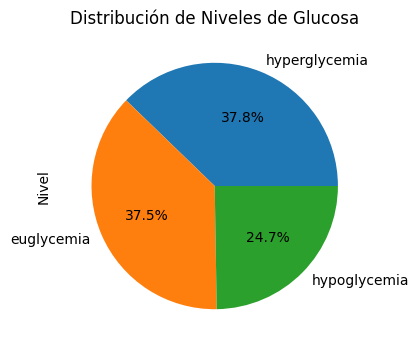

In [123]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [124]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    29993
euglycemia       29780
hypoglycemia     19649
Name: Nivel, dtype: int64

In [125]:
with open('dataset/generado/dataset15min/array_Xval_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [126]:
with open('dataset/generado/dataset15min/array_Yval_down4.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [127]:
with open('dataset/generado/dataset15min/array_Xval_down4.npy', 'rb') as f:
    array_Xval = np.load(f)

In [128]:
len(array_Xval)

79422

In [129]:
with open('dataset/generado/dataset15min/array_Yval_down4.npy', 'rb') as f:
    array_Yval = np.load(f)

In [130]:
len(array_Yval)

79422

In [131]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

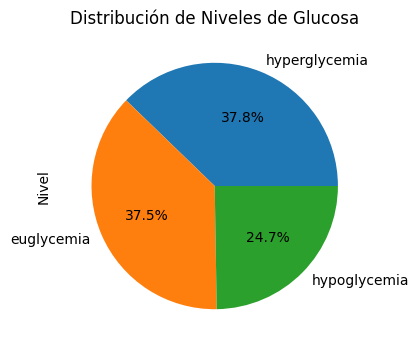

In [132]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [133]:
df_Yval_scaled['Nivel'].value_counts()

hyperglycemia    29993
euglycemia       29780
hypoglycemia     19649
Name: Nivel, dtype: int64

In [134]:
minClass=df_Y_scaled['Nivel'].value_counts().min()
minClass

19649

In [135]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',False,minClass) 

In [136]:
len(YnewLabel)

69078

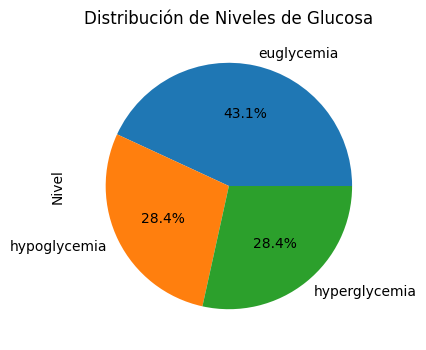

In [137]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [138]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       29780
hypoglycemia     19649
hyperglycemia    19649
Name: Nivel, dtype: int64

In [139]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

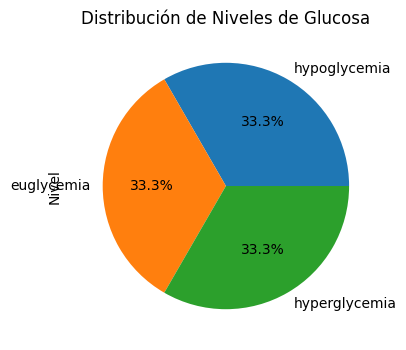

In [140]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [141]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     19649
euglycemia       19649
hyperglycemia    19649
Name: Nivel, dtype: int64

<AxesSubplot: >

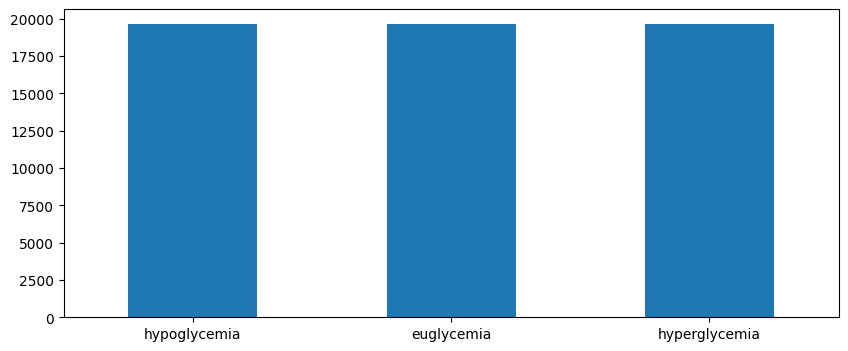

In [142]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [143]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [144]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)